#### Data Loading

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data
df = pd.read_csv('Dataset.csv')
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,11,'C1760492708','1','F','28007','M1823072687','28007','es_transportation',52.35,0
1,172,'C1222389110','3','M','28007','M1823072687','28007','es_transportation',14.75,0
2,106,'C879949041','3','F','28007','M1823072687','28007','es_transportation',3.73,0
3,86,'C409740988','5','M','28007','M1823072687','28007','es_transportation',61.42,0
4,152,'C671449181','3','F','28007','M692898500','28007','es_health',9.05,0


In [23]:
sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)

In [24]:
print(df.shape)
print(df.dtypes)
df.head()
df.tail()
df.sample(5)

(535178, 10)
step             int64
customer        object
age             object
gender          object
zipcodeOri      object
merchant        object
zipMerchant     object
category        object
amount         float64
fraud            int64
dtype: object


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
111429,14,'C318717540','4','M','28007','M348934600','28007','es_transportation',75.22,0
372565,47,'C1929968596','2','F','28007','M1823072687','28007','es_transportation',41.70,0
102755,16,'C899895612','4','M','28007','M151143676','28007','es_barsandrestaurants',32.58,0
162543,135,'C1981089677','4','M','28007','M1823072687','28007','es_transportation',0.88,0
448910,54,'C170769685','4','M','28007','M1946091778','28007','es_wellnessandbeauty',10.37,0


In [25]:
# Null check
df.isnull().sum()

# Data types summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535178 entries, 0 to 535177
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         535178 non-null  int64  
 1   customer     535178 non-null  object 
 2   age          535178 non-null  object 
 3   gender       535178 non-null  object 
 4   zipcodeOri   535178 non-null  object 
 5   merchant     535178 non-null  object 
 6   zipMerchant  535178 non-null  object 
 7   category     535178 non-null  object 
 8   amount       535178 non-null  float64
 9   fraud        535178 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 40.8+ MB


In [26]:
!git add .
!git commit -m "Null Values and Data Types"
!git push -u origin main

[main 0e5b560] Null Values and Data Types
 1 file changed, 1166 insertions(+), 1 deletion(-)


remote: Repository not found.
fatal: repository 'https://github.com/Rmp2404/HSBC_hackathon_2025.git/' not found


fraud
0    98.786946
1     1.213054
Name: proportion, dtype: float64


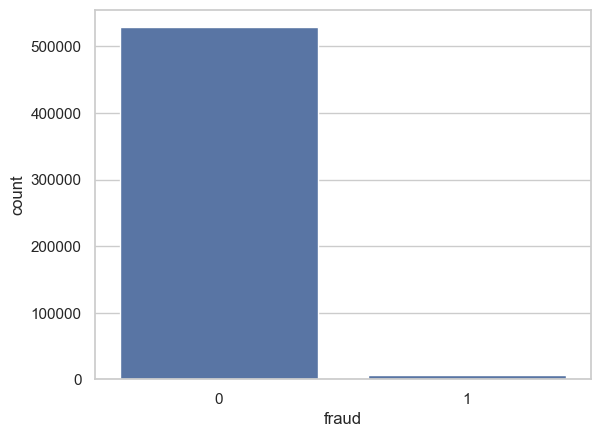

In [8]:
# Distribution of target
sns.countplot(data=df, x='fraud')
fraud_rate = df['fraud'].value_counts(normalize=True) * 100
print(fraud_rate)

In [9]:
!git add .
!git commit -m "Target Distribution and Class Imbalance"
!git push

[main 7091637] Target Distribution and Class Imbalance
 1 file changed, 25 insertions(+), 5 deletions(-)


fatal: The current branch main has no upstream branch.
To push the current branch and set the remote as upstream, use

    git push --set-upstream origin main

To have this happen automatically for branches without a tracking
upstream, see 'push.autoSetupRemote' in 'git help config'.



In [10]:
# Unique value count
cat_cols = ['customer', 'gender', 'zipcodeOri', 'merchant', 'zipMerchant', 'category']
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")

# Check a few example values
df[cat_cols].apply(lambda x: x.unique()[:5])

customer: 4112 unique values
gender: 4 unique values
zipcodeOri: 1 unique values
merchant: 50 unique values
zipMerchant: 1 unique values
category: 15 unique values


customer       ['C1760492708', 'C1222389110', 'C879949041', '...
gender                                      ['F', 'M', 'E', 'U']
zipcodeOri                                             ['28007']
merchant       ['M1823072687', 'M692898500', 'M348934600', 'M...
zipMerchant                                            ['28007']
category       ['es_transportation', 'es_health', 'es_fashion...
dtype: object

In [11]:
# Drop useless columns
df.drop(['zipcodeOri', 'zipMerchant'], axis=1, inplace=True)


In [16]:
df

,step,customer,age,gender,merchant,category,amount,fraud
0,11,'C1760492708','1','F','M1823072687','es_transportation',52.35,0
1,172,'C1222389110','3','M','M1823072687','es_transportation',14.75,0
2,106,'C879949041','3','F','M1823072687','es_transportation',3.73,0
3,86,'C409740988','5','M','M1823072687','es_transportation',61.42,0
4,152,'C671449181','3','F','M692898500','es_health',9.05,0
...,...,...,...,...,...,...,...,...
535173,40,'C1913044357','5','F','M348934600','es_transportation',38.12,0
535174,86,'C1341159565','2','F','M348934600','es_transportation',38.63,0
535175,117,'C1048588440','6','M','M1823072687','es_transportation',0.01,0
535176,47,'C1134333439','3','M','M348934600','es_transportation',20.37,0


#### Feature Engineering


In [21]:
import featuretools as ft

# Create an empty EntitySet
es = ft.EntitySet(id="fraud_data")

# Add the base dataframe
es = es.add_dataframe(
    dataframe_name="transactions",
    dataframe=df.drop(columns=['fraud']),  # Drop target to prevent leakage
    index="transaction_id",                # You must have a unique ID column
    time_index="step",                     # Use step as a time-based feature (if step is time-like)
)


C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
C:\Users\R Madhapreetha\AppData\Local\Programs\Python\P

In [19]:
df['transaction_id'] = df.index

In [20]:
df


,step,customer,age,gender,merchant,category,amount,fraud,transaction_id
0,11,'C1760492708','1','F','M1823072687','es_transportation',52.35,0,0
1,172,'C1222389110','3','M','M1823072687','es_transportation',14.75,0,1
2,106,'C879949041','3','F','M1823072687','es_transportation',3.73,0,2
3,86,'C409740988','5','M','M1823072687','es_transportation',61.42,0,3
4,152,'C671449181','3','F','M692898500','es_health',9.05,0,4
...,...,...,...,...,...,...,...,...,...
535173,40,'C1913044357','5','F','M348934600','es_transportation',38.12,0,535173
535174,86,'C1341159565','2','F','M348934600','es_transportation',38.63,0,535174
535175,117,'C1048588440','6','M','M1823072687','es_transportation',0.01,0,535175
535176,47,'C1134333439','3','M','M348934600','es_transportation',20.37,0,535176


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
# Make a copy of the dataframe to avoid modifying the original
df_encoded = df.copy()

# Convert 'age' column to string type to ensure compatibility with OneHotEncoder
df_encoded['age'] = df_encoded['age'].astype(str)

# Select categorical columns for one-hot encoding
categorical_cols = ['age', 'gender', 'category']

# Apply One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(df_encoded[categorical_cols])

# Create a DataFrame for the encoded features
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=df_encoded.index)


In [15]:
encoded_df

,age_'0',age_'1',age_'2',age_'3',age_'4',age_'5',age_'6',age_'U',gender_'E',gender_'F',gender_'M',gender_'U',category_'es_barsandrestaurants',category_'es_contents',category_'es_fashion',category_'es_food',category_'es_health',category_'es_home',category_'es_hotelservices',category_'es_hyper',category_'es_leisure',category_'es_otherservices',category_'es_sportsandtoys',category_'es_tech',category_'es_transportation',category_'es_travel',category_'es_wellnessandbeauty'
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535173,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
535174,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
535175,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
535176,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
